contours basics:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

edges using hue and s/v channels:

https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color



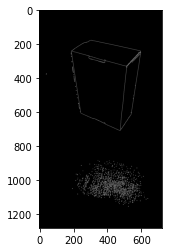

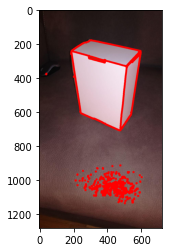

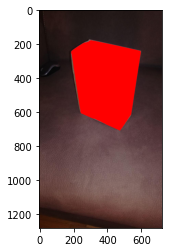

In [35]:
#DRAW EDGES OF THE BOX

import cv2
import numpy as np
from matplotlib import pyplot as plt
debmask=0
debcanny=1
debcycl=0

image=cv2.cvtColor(cv2.imread('body/box3.jpg'),cv2.COLOR_BGR2RGB)
img_can=image.copy()
img_nocan=image.copy()

wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
if debmask:
    plt.imshow(wholemask)
    plt.show()

# find contours
##
filterparam=(100,20,0)
out_edges=cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
##morphology operation also here?
#imagedges=mymorph(imagedges,'open',(1,4,1))
##lines from canny are too small and erosion kills also usefull ones
##rectangular kernel (1,3)or(3,1) can be usefull for vertical/horizontaz lines respectively 
if debcanny:
    plt.imshow(out_edges,cmap='gray')
    plt.show()

##w/ canny
cnts_can= cv2.findContours(out_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_can = cnts_can[0] if len(cnts_can) == 2 else cnts_can[1]
##w/out canny
cnts_nocan= cv2.findContours(wholemask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_nocan = cnts_nocan[0] if len(cnts_nocan) == 2 else cnts_nocan[1]
##or #cnts=imutils.xyz(cnts) for pickup right one wrt py version

#contours selection
##4 edges contours for canny
out_can = []
out_nocan = []

max_area=cv2.contourArea(max(cnts_can, key=len))

check_shape=1

if check_shape:
    for c in cnts_can:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.1 * peri, True)
        #ar = w / float(h)
        if len(approx) < 4:
            if cv2.contourArea(c) >= 0.01*max_area:
                out_can.append(c)
else:
    out_can=cnts_can

##area threshold for contours w/out canny
max_area=cv2.contourArea(max(cnts_nocan, key=len))
for c in cnts_nocan:
    if cv2.contourArea(c) >= 0.01*max_area:
        out_nocan.append(c)
        
##opening/closing for removing noise: better to be done after contours found
##cherrypiching with hough? moments?
## alsoM = cv2.moments(c)
## center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
# contours selection
##improve:dilate before comparison and pick the inner areas

# draw contours
contcolor=(255,0,0)
conthick=10
if debcycl:
    for c in out_can:
        cv2.drawContours(img_can,c, -1, contcolor, conthick) # OR
        #cv2.polylines(image, [box], True, (36,255,12), 3)
    for c in out_nocan:
        cv2.drawContours(img_nocan,c, -1, contcolor, conthick)
else:
    cv2.drawContours(img_nocan,out_nocan, -1, contcolor, -1)
    cv2.drawContours(img_can,out_can, -1, contcolor, conthick)

plt.imshow(img_can)
plt.show()
#img_nocan=mymorph(img_nocan,'erode',(5,5,20))
plt.imshow(img_nocan)    
plt.show()

contours cherrypicking using number of edges is not working properly, every edge of the box is found as an independent contour

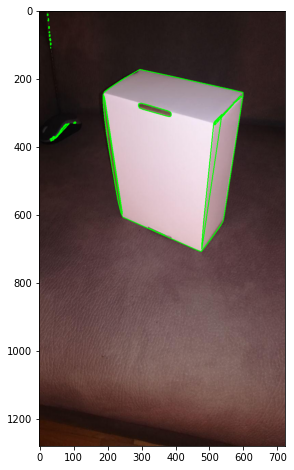

In [47]:
#convex hull
import cv2
import numpy as np
from matplotlib import pyplot as plt
debmask=0
debcanny=1
debcycl=0

image=cv2.cvtColor(cv2.imread('body/box3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edge = cv2.Canny(gray, 140, 210)
contours= cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

plt.subplots(1, figsize=(12,8))
plt.imshow(image)
plt.show()


In [26]:
    
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING


#if self.verifySizes(rect):
    #...
    #rect.append(...verifyed) 
poly = cv2.boxPoints(rect)
#cx, cy = rect[0]
#w, h = rect[1]
#theta = rect[2]
#box[idx, :] = [cx, cy, w, h, theta]
#box = np.asarray(box, dtype = xs.dtype)

NameError: name 'box' is not defined

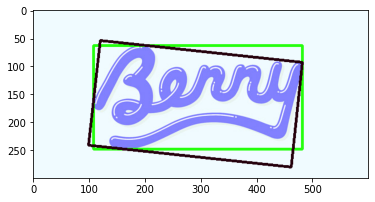

In [1]:
#bounding rect and rotated rectangle
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, convert to grayscale, Otsu's threshold for binary image
image = cv2.imread("body/commercial.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

x,y,w,h = cv2.boundingRect(cnts[0])
cv2.rectangle(image, (x,y), (x+w,y+h), (36,255,12), 3)

rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,0,12), 3) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)

# taking biggest contour and minarearect
#max_contour = max(cnts, key=len)
#rect = cv2.minAreaRect(max_contour)


plt.imshow(image)
plt.show()

In [14]:
def mythreshold(img2thr,thrmethod, thrparam):
    
     #adaptive param??
    
    if thrmethod=='canny':
        #requires 3 param , eg: thrparam=(120,255,0)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg = cv2.Canny(img2thr_grey, thrparam[0], thrparam[1], thrparam[2])
    elif thrmethod=='simple':
        #requires 2 param , eg: thrparam=(127,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],cv2.THRESH_BINARY)
        #also cv2.THRESH_BINARY_INV , cv2.THRESH_TRUNC , cv2.THRESH_TOZERO , cv2.THRESH_TOZERO_INV
    elif thrmethod=='otsu':
        #requires 2 param , eg: thrparam=(0,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],
                                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif thrmethod=='adaptive':
        # requires 3 param , eg: thrparam=(255,11,2)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg=cv2.adaptiveThreshold(img2thr_grey,thrparam[0], cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY,thrparam[1], thrparam[2])
        #also cv2.ADAPTIVE_THRESH_GAUSSIAN_C , same parameters
    elif thrmethod=='killcolor':
        #requires 2 param (vectorial) , eg: thrcol_low=(50,50,50) , thrcol_high=(255,255,255)
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5]) #color window
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV) #hsv 
        thrmask = cv2.bitwise_not(cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high))
        thrdimg = thrmask# for the mask #cv2.bitwise_and(img2thr,img2thr, mask=thrmask) #for the masked image
    elif thrmethod=='letcolor':
        #requires 2 param (vectorial) ,
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5])
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV)
        thrmask = cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high)
        thrdimg = thrmask#cv2.bitwise_and(img2thr,img2thr, mask=thrmask)
    #else: print('not binarized!')
    return thrdimg

## switch, elif, dictionaris: which one to use?
#https://www.pydanny.com/why-doesnt-python-have-switch-case.html
#https://stackoverflow.com/questions/60208/replacements-for-switch-statement-in-python
## more efficient way to pass many parameters
#
def myfilter(fltgimg,fltmeth,fltparam):
    
    #adaptive kernel ??
    
    if fltmeth=='gaussian':
        #3param eg: fltparam=(21,21,0)
        filtdimg=cv2.GaussianBlur(fltgimg, (fltparam[0],fltparam[1]),fltparam[2])
    elif fltmeth=='bilateral':
        #3param eg: fltparam=(21,51,51)
        filtdimg=cv2.bilateralFilter(fltgimg,fltparam[0],fltparam[1],fltparam[2])
    #elif fltmeth=='mean':
        #
    elif fltmeth=='median':
        #1param eg: fltparam=(21)
        filtdimg=cv2.medianBlur(img, fltparam[0])
    #else: print('not filtered')
    return filtdimg

#https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

def mymorph(mrpimg,mrpmeth,mrpparam):
# requires 4 param ie: mrpparam=(kern_sizex,kern_sizey,numbiter_erode, numbiter_dilate)    
    #adaptive kernel??
    
    
    #if mrpmeth!=0:
    if mrpparam[0]==0:
        mrpkernel=cv2.getStructuringElement( cv2.MORPH_RECT, (7,7))
    else:
        mrpkernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( mrpparam[0], mrpparam[1] ) )
    if mrpmeth=='close':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_CLOSE, mrpkernel )
    elif mrpmeth=='open':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_OPEN, mrpkernel )    
    elif mrpmeth=='erode':
        mrpdimg = cv2.erode(mrpimg,mrpkernel,iterations = mrpparam[2])
    elif mrpmeth=='dilate':
        mrpdimg = cv2.dilate(mrpimg,mrpkernel,iterations = mrpparam[2])
    #else: print('not morphed')
        
    return mrpdimg

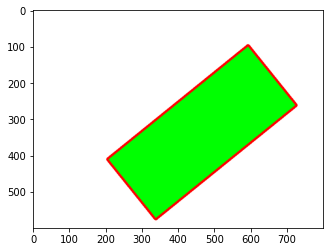

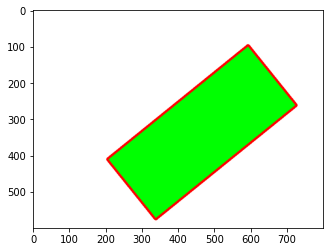

In [42]:
#rectangle's contours
import cv2
import numpy as np
from matplotlib import pyplot as plt
test=1
image=cv2.cvtColor(cv2.imread('body/rectangle.jpg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),filterparam[0], filterparam[1], filterparam[2])
cnts= cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours=cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = contours[0] if len(contours) == 2 else contours[1]
#print(cnts)
#print(contours)
rect_cnts = []
rect_contours=[]
max_cnt = max(cnts, key=len)
max_contour=max(contours,key=len)
max_area_cnts=cv2.contourArea(max_cnt)
max_area_contours=cv2.contourArea(max_contour)
if test:
    periratio=0.1
    arearatio=0.3
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt,periratio* peri, True)
        if len(approx) == 4 and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_cnts.append(cnt)
    for cnt in cnts:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, periratio * peri, True)
        if len(approx) == 4 and cv2.contourArea(cnt)>=arearatio*max_area_contours:
            rect_contours.append(cnt)
else:
    rect_cnts=cnts
    rect_contours=contours
#print(len(rect_cnts))    
#print(len(rect_contours))
contcolor=(255,0,0)
cv2.drawContours(image,rect_cnts, -1, contcolor, 5)
cv2.drawContours(imageout,rect_contours, -1, contcolor, 5)
plt.imshow(image)
plt.show()
plt.imshow(imageout)
plt.show()

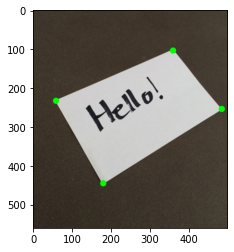

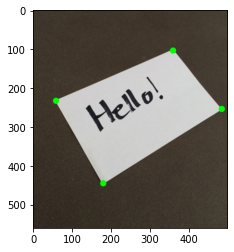

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
test=1
image=cv2.cvtColor(cv2.imread('body/perspective-card.jpeg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),filterparam[0], filterparam[1], filterparam[2])
cnts= cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours=cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = contours[0] if len(contours) == 2 else contours[1]
#print(cnts)
#print(contours)
rect_cnts = []
rect_contours=[]
max_cnt = max(cnts, key=len)
max_contour=max(contours,key=len)
max_area_cnts=cv2.contourArea(max_cnt)
max_area_contours=cv2.contourArea(max_contour)
if test:
    periratio=0.1
    arearatio=0.3
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt,periratio* peri, True)
        if cv2.isContourConvex(cnt) and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_cnts.append(cnt)
    for cnt in cnts:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, periratio * peri, True)
        if cv2.isContourConvex(cnt) and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_contours.append(cnt)
else:
    rect_cnts=cnts
    rect_contours=contours
#print(len(rect_cnts))    
#print(len(rect_contours))
contcolor=(255,0,0)
cv2.drawContours(image,rect_cnts, -1, contcolor, 5)
cv2.drawContours(imageout,rect_contours, -1, contcolor, 5)
plt.imshow(image)
plt.show()
plt.imshow(imageout)
plt.show()